In [ ]:

import sys
import torch
import os
sys.path.append('..')

os.chdir('..')

In [ ]:
from datasets.cwru_dataset import CrwuDataset
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")

In [19]:
window_size = 2048

In [20]:
model = mlflow.pytorch.load_model(f"models:/transformer_encoder_cwru_{window_size}/1")

In [21]:
dataset = CrwuDataset(seq_len=window_size, rdir="./data/dataset/CWRU/", fault_location="DriveEnd")
print(dataset.X.shape)
print(dataset.y.shape)

Loading preprocessed data...
(3897, 1, 2048)
(3897,)


Text(0.5, 1.0, 'True Label: 0.021-Ball')

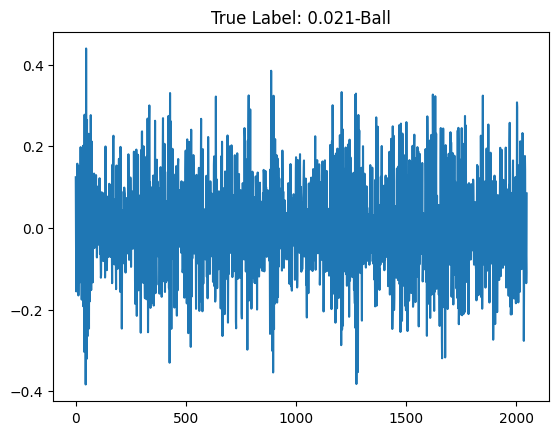

In [28]:
# Choose a sample for inference
index = 2001
sample_X = dataset.X[index]
sample_y = dataset.y[index]

labels = dataset.labels()

from matplotlib import pyplot as plt
plt.plot(sample_X.flatten())
plt.title(f"True Label: {labels[sample_y]}")

In [29]:
model.eval()
with torch.no_grad():
    input_tensor = torch.tensor([sample_X], dtype=torch.float32)
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    print(f"Predicted Label: {labels[predicted_class]}")

Predicted Label: 0.021-Ball
